Collaborated with Rishi Mule

### Question 1

In [1]:
from tqdm import tqdm
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
authors = []
citations = []
titles = []
years= []
publications = []
venues = []
descriptions = []


with open('acm.txt', 'r', encoding="utf-8") as file:
    auth = None
    citation = None
    title = None
    year=None
    pub = None
    venue = None
    desc = None
    for i, line in tqdm(enumerate(file)):
        line = line.strip()
        if line.startswith('#c'):
            venue = line[2:]
        elif line.startswith('#!'):
            desc = line[2:]
        elif line.startswith('#%'):
            if citation==None:
                citation =[]
            citation.append(pub+'_'+line[2:])
        elif line.startswith('#index'):
            pub = line[6:]
        elif line.startswith('#t'):
            year = line[2:]
        elif line.startswith('#@'):
            auth = line[2:]
        elif line.startswith('#*'):
            title = line[2:]
        elif line == '':
            if auth!=None:
                list_auth = auth.split(',')
                auth = list_auth
            authors.append(auth)  
            citations.append(citation)
            titles.append(title)
            years.append(year)
            publications.append(pub)
            venues.append(venue)
            descriptions.append(desc)
            auth = None
            citation = None
            title = None
            year=None
            pub = None
            venue = None
            desc = None
        
#@ author
#* title
#t year
#c venues
#index publication
#% citation
#! description          
                
            

25494853it [01:43, 246521.66it/s]


In [3]:
df_dict = {'authors':authors, 'titles':titles, 'citations':citations, 'years':years, 'publications':publications,'venues':venues, 'descriptions': descriptions}
dataframe = pd.DataFrame(df_dict)
dataframe.head(-50)

authors  \
0                                                     None   
1                                       [Virgil D. Gligor]   
2                              [M. Gyssens,  J. Paredaens]   
3        [Sushil Jajodia,  Peter A. Ng,  Frederick N. S...   
4                                            [Rene Moreau]   
...                                                    ...   
2385011                                                [-]   
2385012                                               None   
2385013                                            [-,  -]   
2385014                    [-,  -,  -,  -,  -,  -,  -,  -]   
2385015                                [-,  -,  -,  -,  -]   

                                                    titles          citations  \
0        MOSFET table look-up models for circuit simula...               None   
1        The verification of the protection mechanisms ...               None   
2        Another view of functional and multivalued dep...               None   
3           Entity-relationship diagrams which are in BCNF               None   
4                                The computer comes of age               None   
...                                                    ...                ...   
2385011  On Hardness of Multilinearization and VNP-Comp...  [2385012_2381731]   
2385012  ACM Transactions on Design Automation of Elect...               None   
2385013  Scalable SMT-Based Equivalence Checking of Nes...  [2385014_2381731]   
2385014  Unsupervised Head--Modifier Detection in Searc...  [2385015_2381731]   
2385015  World Knowledge as Indirect Supervision for Do...  [2385016_2381731]   

        years publications                                             venues  \
0        1984            1                      Integration, the VLSI Journal   
1        1984            2      International Journal of Parallel Programming   
2        1984            3      International Journal of Parallel Programming   
3        1984            4      International Journal of Parallel Programming   
4        1984            5                          The computer comes of age   
...       ...          ...                                                ...   
2385011  2016      2385012      ACM Transactions on Computation Theory (TOCT)   
2385012  2016      2385013  ACM Transactions on Design Automation of Elect...   
2385013  2016      2385014  ACM Transactions on Design Automation of Elect...   
2385014  2016      2385015  ACM Transactions on Knowledge Discovery from D...   
2385015  2016      2385016  ACM Transactions on Knowledge Discovery from D...   

                                              descriptions  
0                                                     None  
1                                                     None  
2                                                     None  
3                                                     None  
4                                                     None  
...                                                    ...  
2385011  For a Boolean function f&colon; &lcub;0, 1&rcu...  
2385012                                               None  
2385013  In this article, we present a novel methodolog...  
2385014  Interpreting the user intent in search queries...  
2385015  One of the key obstacles in making learning pr...  

[2385016 rows x 7 columns]

In [4]:
author_list_df = dataframe['authors'].tolist()
print(author_list_df[:10])

[None, ['Virgil D. Gligor'], ['M. Gyssens', ' J. Paredaens'], ['Sushil Jajodia', ' Peter A. Ng', ' Frederick N. Springsteel'], ['Rene Moreau'], ['A. G. Akritas', ' S. S. Lyengar', ' A. A. Rampuria'], ['C. C. Chang', ' M. W. Du', ' R. C. T. Lee'], ['David Haussler'], ['Hans Röck'], ['George M. Trojan']]


### A. Compute the number of distinct authors, publication venues, publications, and citations/references

In [5]:
distinct_author = set()
for auth in tqdm(dataframe['authors']):
    if auth!=None:
        for i in auth:
            distinct_author.add(i.strip())
print("Distinct Author Count : ",len( distinct_author))

100%|██████████| 2385066/2385066 [00:08<00:00, 290693.63it/s]

Distinct Author Count :  1651589


In [6]:
distinct_publication_venues = set()
for venue in tqdm(dataframe['venues']):
    if venue!=None:
        distinct_publication_venues.add(venue.strip())
print("Distinct Publication Venue Count : ", len(distinct_publication_venues))

100%|██████████| 2385066/2385066 [00:02<00:00, 938441.35it/s]

Distinct Publication Venue Count :  273329


In [7]:
distinct_publications = set()
for pub in tqdm(dataframe['publications']):
    if venue!=None:
        distinct_publications.add(pub.strip())
print("Distinct Publications Count : ", len(distinct_publications))

100%|██████████| 2385066/2385066 [00:03<00:00, 705650.31it/s]

Distinct Publications Count :  2385057


In [8]:
distinct_citations = set()
for citation in tqdm(dataframe['citations']):
    if citation!=None:
        for i in citation:
            distinct_citations.add(i.strip())
print("Distinct Citations Count : ", len(distinct_citations))

100%|██████████| 2385066/2385066 [00:07<00:00, 317741.29it/s]

Distinct Citations Count :  9671893


### B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?

In [9]:
venue_PPKD = set()
for venue in tqdm(dataframe['venues']):
    if venue!=None and 'Principles and Practice of Knowledge Discovery in Databases' in venue:
        venue_PPKD.add(venue.strip())
pprint(venue_PPKD)
len(venue_PPKD)

100%|██████████| 2385066/2385066 [00:02<00:00, 1099908.85it/s]

{'Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on '
 'Principles and Practice of Knowledge Discovery in Databases, Porto, '
 'Portugal, October ... / Lecture Notes in Artificial Intelligence)',
 'Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on '
 'Principles and Practice of Knowledge Discovery in Databases, Berlin, '
 'Germany, September ... (Lecture Notes in Computer Science)',
 "PKDD '04 Proceedings of the 8th European Conference on Principles and "
 'Practice of Knowledge Discovery in Databases',
 'PKDD 2007 Proceedings of the 11th European conference on Principles and '
 'Practice of Knowledge Discovery in Databases',
 "PKDD'05 Proceedings of the 9th European conference on Principles and "
 'Practice of Knowledge Discovery in Databases'}


5

The numbers don't seem accurate as Principles and Practice of Knowledge Discovery in Databases venue has multiple entries

### C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

In [10]:
author_publications = defaultdict(int)
for auth in tqdm(dataframe['authors']):
    if auth!=None:
        for i in auth:
            author_publications[i.strip()]+=1

100%|██████████| 2385066/2385066 [00:10<00:00, 238052.53it/s]


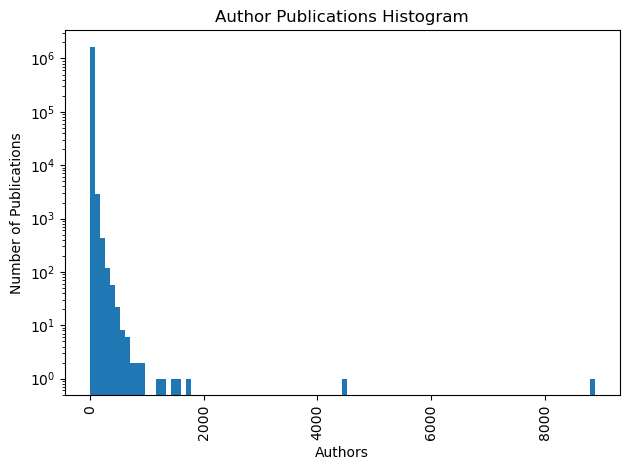

In [11]:

plt.hist(author_publications.values(),bins=100,log=True)
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.title('Author Publications Histogram')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [12]:
# mean_value = dataframe['publications'].mean()
# print(mean_value)

import statistics

In [13]:
# Calculate mean and standard deviation
mean_value = statistics.mean(author_publications.values())
std_deviation = statistics.stdev(author_publications.values())

# Calculate quartiles
sorted_values = sorted(author_publications.values())
q1 = statistics.median_low(sorted_values[:len(sorted_values)//2])
q2 = statistics.median(sorted_values)
q3 = statistics.median_high(sorted_values[len(sorted_values)//2:])

# Print the results
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Q1 (1st Quartile): {q1}")
print(f"Q2 (Median): {q2}")
print(f"Q3 (3rd Quartile): {q3}")

Mean: 3.4626320470770877
Standard Deviation: 12.772654682112744
Q1 (1st Quartile): 1
Q2 (Median): 1
Q3 (3rd Quartile): 3


The mean is influenced by extreme values and can be sensitive to outliers, while the median is less affected by extreme values. 


### E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

In [14]:
venue_publications = defaultdict(int)
for venue in tqdm(dataframe['venues']):
    if venue!=None:
        venue_publications[venue.strip()]+=1

100%|██████████| 2385066/2385066 [00:02<00:00, 1000431.91it/s]


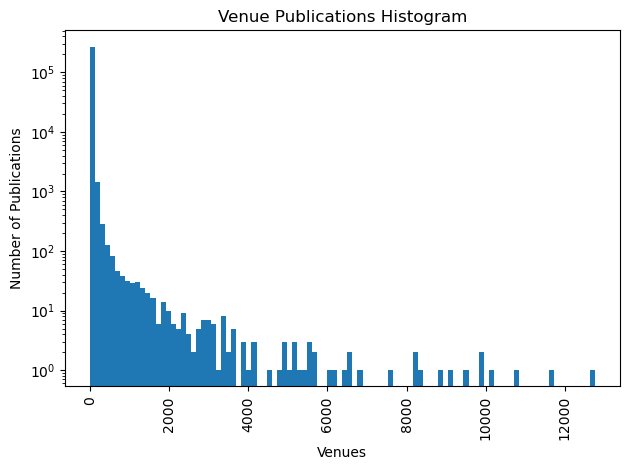

In [15]:

plt.hist(venue_publications.values(),bins=100,log=True)
plt.xlabel('Venues')
plt.ylabel('Number of Publications')
plt.title('Venue Publications Histogram')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [16]:
# Calculate mean and standard deviation
mean_value = statistics.mean(venue_publications.values())
std_deviation = statistics.stdev(venue_publications.values())

# Calculate quartiles
sorted_values = sorted(venue_publications.values())
q1 = statistics.median_low(sorted_values[:len(sorted_values)//2])
q2 = statistics.median(sorted_values)
q3 = statistics.median_high(sorted_values[len(sorted_values)//2:])

# Print the results
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Q1 (1st Quartile): {q1}")
print(f"Q2 (Median): {q2}")
print(f"Q3 (3rd Quartile): {q3}")

Mean: 8.725484672317975
Standard Deviation: 106.79603003804166
Q1 (1st Quartile): 1
Q2 (Median): 1
Q3 (3rd Quartile): 1


In [17]:
max_venue = max(venue_publications, key=venue_publications.get)
max_count = venue_publications[max_venue]

print("Venue with the largest number of publications : ", max_venue, max_count)

Venue with the largest number of publications :  IEEE Transactions on Information Theory 12754


### F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [18]:
def count_reference(reference):
    if reference is None or reference == 'None':
        return 0
    else:
        return len(reference)

# Create a new Series with the counts
references_count_series = dataframe['citations'].apply(count_reference)


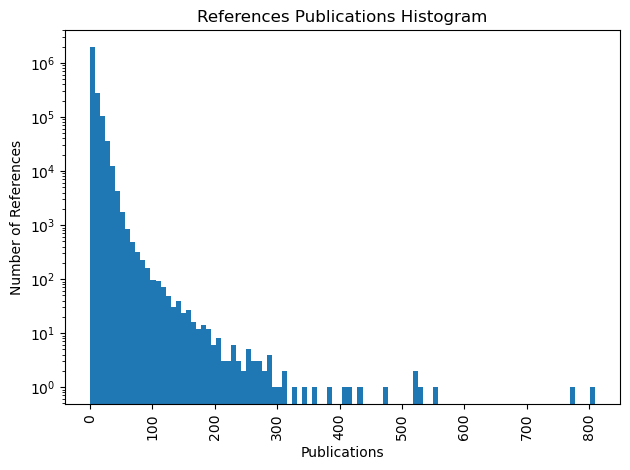

In [19]:
plt.hist(references_count_series,bins=100,log=True)
plt.xlabel('Publications')
plt.ylabel('Number of References')
plt.title('References Publications Histogram')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [20]:
max_pub = dataframe.at[references_count_series.idxmax(), 'publications']
max_count = references_count_series.max()

print("Publications with the largest number of references : ", max_pub, max_count)

Publications with the largest number of references :  2015217 809


In [21]:
publication_citation = defaultdict(int)

for citations in tqdm(dataframe['citations']):
    if citations!=None:
        for i in citations:
            ref = i.split('_')[1]
            publication_citation[ref.strip()]+=1

100%|██████████| 2385066/2385066 [00:16<00:00, 144677.86it/s]


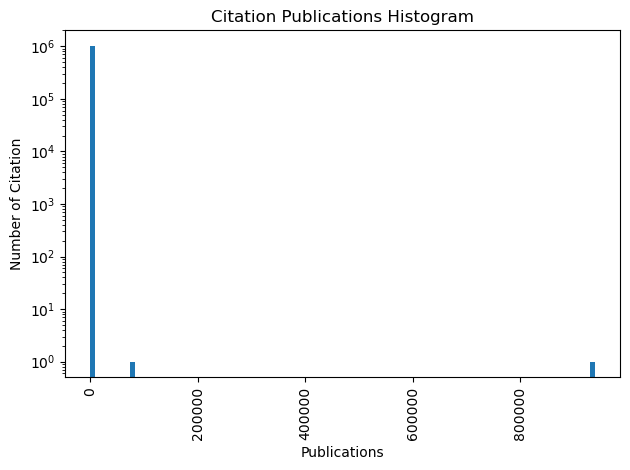

In [22]:
plt.hist(publication_citation.values(),bins=100,log=True)
plt.xlabel('Publications')
plt.ylabel('Number of Citation')
plt.title('Citation Publications Histogram')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [23]:

sorted_publications = list(sorted(publication_citation.values())[::-1]).copy()

max_val  = sorted_publications.pop(0)
sorted_publications.pop(0)


82080

After removing outliers

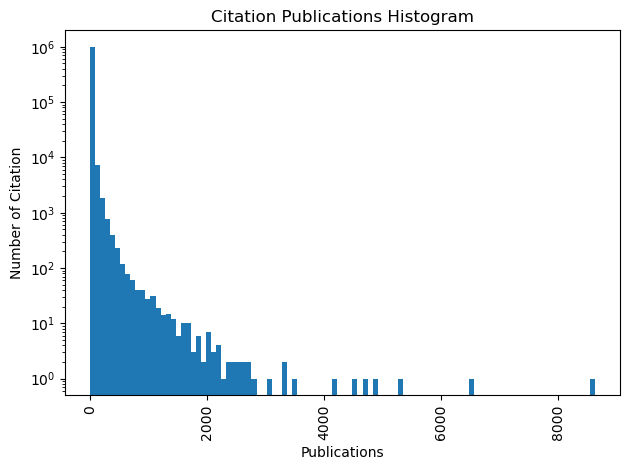

In [24]:
plt.hist(sorted_publications,bins=100,log=True)
plt.xlabel('Publications')
plt.ylabel('Number of Citation')
plt.title('Citation Publications Histogram')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [25]:
max_key = max(publication_citation, key=publication_citation.get)
max_count = publication_citation[max_key]

print("Publications with the largest number of citation : ", max_key, max_count)


Publications with the largest number of citation :  2135000 938039


### G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [26]:
def count_citation(citation):
    if citation is None or citation == 'None':
        return 0
    else:
        return len(citation)

# Create a new Series with the counts
citation_count_series = dataframe['citations'].apply(count_citation)

venue_citation = defaultdict(int)
for i in tqdm(range(len(dataframe))):
    venue_citation[dataframe.loc[i,'venues']]+=citation_count_series.loc[i]

100%|██████████| 2385066/2385066 [01:21<00:00, 29320.72it/s]


In [27]:
venue_publications_list = defaultdict(set)
publication_citation_count = defaultdict(int)

def get_publications_for_venue(publication, venue):
    venue_publications_list[venue].add(publication)

# def get_citation_count_for_publication(publication,citation):
#     if citation is None or citation == 'None':
#         #do nothing
#         publication_citation_count[publication]+=0
#     else:
#         publication_citation_count[publication]+=len(citation) 
   

# def get_citation_count_for_venue(venue,citation):
#     if citation is None or citation == 'None':
#         #do nothing
#         publication_citation_count[venue]+=0
#     else:
#         publication_citation_count[venue]+=len(citation) 
    



# Use .apply along columns 
dataframe.apply(lambda row: get_publications_for_venue(row['publications'], row['venues']), axis=1)
# dataframe.apply(lambda row: get_citation_count_for_venue(row['citations'], row['venues']), axis=1)



0          None
1          None
2          None
3          None
4          None
           ... 
2385061    None
2385062    None
2385063    None
2385064    None
2385065    None
Length: 2385066, dtype: object

In [28]:
final_impact_count = dict()


for venue in venue_publications_list.keys():
    publications = venue_publications_list[venue]
    count_pub = len(publications)
    count = 0
    for i in publications:
        count+=publication_citation_count[i]
    final_impact_count[venue] = venue_citation[venue]/count_pub
# check for references

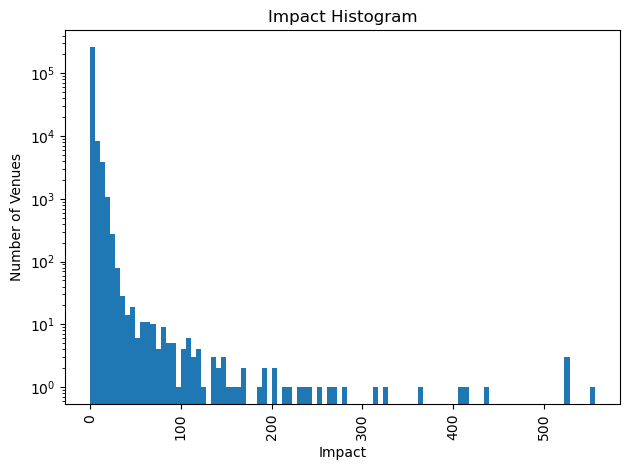

In [29]:
plt.hist(list(final_impact_count.values()),bins=100,log=True)
plt.xlabel('Impact')
plt.ylabel('Number of Venues')
plt.title('Impact Histogram')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### H. What is the venue with the highest apparent impact factor? Do you believe this number?

In [30]:
max_key = max(final_impact_count, key=final_impact_count.get)
max_count = final_impact_count[max_key]

print("Venue with the largest impact count : ", max_key, max_count)


Venue with the largest impact count :  System-on-Chip Test Architectures: Nanometer Design for Testability 556.0


### I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

In [31]:
final_impact_count_restricted = dict()


for venue in venue_publications_list.keys():
    publications = venue_publications_list[venue]
    count_pub = len(publications)
    if count_pub>10:
        count = 0
        for i in publications:
            count+=publication_citation_count[i]
        final_impact_count_restricted[venue] = venue_citation[venue]/count_pub
# check for references

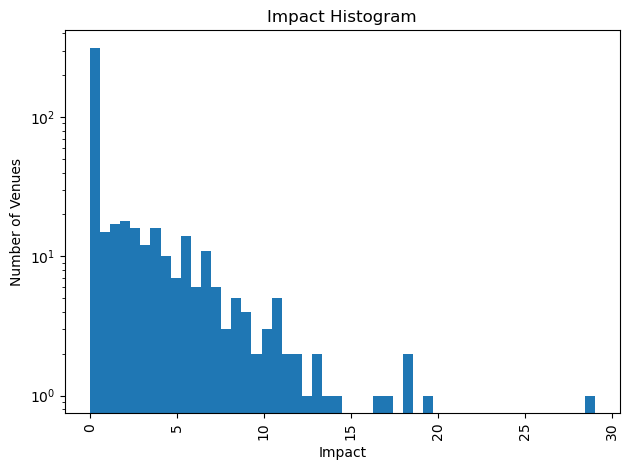

In [32]:
plt.hist(list(final_impact_count_restricted.values())[:500],bins=50,log=True)
plt.xlabel('Impact')
plt.ylabel('Number of Venues')
plt.title('Impact Histogram')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [39]:
ref ={}
pubs = {}
cite = {}
pubs = {}

with open("acm.txt", "r", encoding="utf8") as infile:   
    index = 0
    for line in tqdm(infile):
        line = line.strip()
        if line.startswith("#index"):
            index = int(line[6:])
        elif line.startswith("#c"):
            venue = line[2:]
            if pubs.get(index) == None:
                pubs[index] = venue
                
        elif line.startswith("#%"):
            if ref.get(index) == None:
                ref[index] = 1
            else :
                ref[index] += 1
                
            if cite.get(int(line[2:])) == None:
                cite[int(line[2:])] = 1
            else:
                cite[int(line[2:])]  += 1 

25494853it [01:59, 213168.93it/s]


In [40]:
import collections

publication_years = {}
with open("acm.txt", "r", encoding="utf8") as infile: 
    year = 0 
    index = 0
    for line in tqdm(infile):
        line = line.strip()
        if line.startswith("#index"):
            index = int(line[6:])
        elif line.startswith("#t") and len(line) == 6:
#             print(line)
            year = int(line[2:])
            if publication_years.get(year) == None:
                publication_years[year] = {"publications":0,"citations":0,"references":0}
                publication_years[year]["publications"] = 1
                if cite.get(index)!= None:
                    publication_years[year]["citations"] = cite.get(index)
                if ref.get(index)!= None:
                    publication_years[year]["references"] = ref.get(index)
            else:
                publication_years[year]["publications"] += 1
                if cite.get(index) != None:
                    publication_years[year]["citations"] += cite.get(index)
                if ref.get(index) != None:
                    publication_years[year]["references"] += ref.get(index)
                    
average_year = {}
for year in publication_years.keys():
    average_year[year] = {}
    average_year[year]["citations"] = publication_years[year]["citations"]/publication_years[year]["publications"]
    average_year[year]["references"] = publication_years[year]["references"]/publication_years[year]["publications"]
    
average_year = collections.OrderedDict(sorted(average_year.items()))

25494853it [00:58, 435058.81it/s]


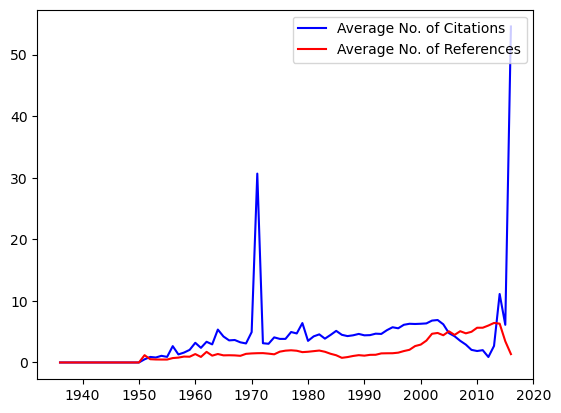

In [42]:
# Plotting the graph for Average No. of Citations and Average No. of References for every year

x = list(average_year.keys())
y1 = list([average_year[i]["citations"] for i in x])
y2 = list([average_year[i]["references"] for i in x])

fig, ax = plt.subplots()

plt.plot( x, y1, "blue" ,label = "Average No. of Citations")
plt.plot( x, y2,  "red",label = "Average No. of References")
legend = ax.legend(loc='upper right')
plt.show()

The average number of references is increasing gradually over the years till 2010, after that we can see a fall in references.

The number of citations can see 2 peaks over the years. one around 1970 and other around 2015-2020

#  PROBLEM 2 : Kosarak Association Rules
Your task is to take a dataset of nearly one million clicks on a news site16 and use the Weka Explorer to identify interesting association rules. Ordinarily this would be a point-and-click task; however, the input data format is a list of transactions (each line in the file includes a list of anonymized news item id’s), whereas Weka requires a tabular format. Specifically, each distinct news item id should be represented via a column/attribute, and each row/instance should be a sequence of binary values, indicating whether or not the user visited the corresponding news item.

### A. Write a Python program which takes as its argument5 the path to a text file of data (assumed to be in the itemset format above) and produces as output to the console a sparse ARFF file.

In [43]:
def convert_txt_to_arff(path):
    news_id_set = set()
    news_id_index = {}
    news_id_list = []

    with open(path,'r') as f:
        for j, line in tqdm(enumerate(f)):

            news_ids = np.array(line.strip().split()).astype(int)

            for news_id in news_ids:
                news_id_set.add(news_id)

            news_id_list.append(news_ids)

        for news_id in tqdm(news_id_set):
            news_id_index[news_id] = len(news_id_index.keys())
            
        output_filename = 'kosarak_sparse.arff'
        with open(output_filename,"w") as f:

            f.write('%The Kosarak Dataset' + '\n\n')
            f.write('@relation NewsIDs' + '\n')
            f.write('\n')

            for id_ in news_id_index.keys():
                f.write('@attribute' + ' ' + str(id_) + ' ' + '{0, 1}' + '\n')

            f.write('\n')
            f.write('@data' + '\n')

            for news_ids in news_id_list:
                line = ''
                news_ids = np.unique(sorted(news_ids))
                for id_ in news_ids:
                    if line == '':
                        line = str(news_id_index[id_]) + ' ' + str(1)
                    else:
                        line += ', ' + str(news_id_index[id_]) + ' ' + str(1)
                write_to_file = '{' + line + '}' + '\n'
                f.write(write_to_file)

### B. Use your program to convert the kosarak.dat file to a sparse kosarak.arff. About how long did it take to run?


In [44]:
%%time
convert_txt_to_arff('kosarak.dat.txt')

990002it [00:20, 48820.80it/s]
100%|██████████| 41270/41270 [00:00<00:00, 1024490.42it/s]


CPU times: total: 25.2 s
Wall time: 58.3 s


### D. Use Weka’s FP-Growth implementation to find rules that have support count of at least 49, 500 and confidence of at least 99% – record your rules (there should be 2).

=== Run information ===

Scheme:       weka.associations.FPGrowth -P 2 -I -1 -N 10 -T 0 -C 0.99 -D 0.05 -U 1.0 -M 49500.0
Relation:     NewsIDs
Instances:    990002
Attributes:   41270
              [list of attributes omitted]
=== Associator model (full training set) ===

FPGrowth found 2 rules (displaying top 2)

1. [11=1, 218=1, 148=1]: 50098 ==> [6=1]: 49866   <conf:(1)> lift:(1.64) lev:(0.02) conv:(84.4) 
2. [11=1, 148=1]: 55759 ==> [6=1]: 55230   <conf:(0.99)> lift:(1.63) lev:(0.02) conv:(41.3) 

### E. Run the algorithm at least 5 times. Then look to the log and record how much time each took. How does the average time compare to the time necessary to convert the dataset and then load into Weka?


15:28:43: Weka Explorer
15:28:43: (c) 1999-2022 The University of Waikato, Hamilton, New Zealand
15:28:43: web: https://www.cs.waikato.ac.nz/~ml/weka/
15:28:43: Started on Tuesday, 23 January 2024
15:29:04: Base relation is now NewsIDs (990002 instances)
15:29:39: Started weka.associations.FPGrowth
15:29:39: Command: weka.associations.FPGrowth -P 2 -I -1 -N 10 -T 0 -C 0.99 -D 0.05 -U 1.0 -M 49500.0
15:29:41: Finished weka.associations.FPGrowth
15:30:00: Started weka.associations.FPGrowth
15:30:00: Command: weka.associations.FPGrowth -P 2 -I -1 -N 10 -T 0 -C 0.99 -D 0.05 -U 1.0 -M 49500.0
15:30:03: Finished weka.associations.FPGrowth
15:30:03: Started weka.associations.FPGrowth
15:30:03: Command: weka.associations.FPGrowth -P 2 -I -1 -N 10 -T 0 -C 0.99 -D 0.05 -U 1.0 -M 49500.0
15:30:06: Finished weka.associations.FPGrowth
15:30:07: Started weka.associations.FPGrowth
15:30:07: Command: weka.associations.FPGrowth -P 2 -I -1 -N 10 -T 0 -C 0.99 -D 0.05 -U 1.0 -M 49500.0
15:30:09: Finished weka.associations.FPGrowth
15:30:10: Started weka.associations.FPGrowth
15:30:10: Command: weka.associations.FPGrowth -P 2 -I -1 -N 10 -T 0 -C 0.99 -D 0.05 -U 1.0 -M 49500.0
15:30:12: Finished weka.associations.FPGrowth

Time taken for 5 runs was as follows - 2 3 3 2 2

The average for above is 2.4

## PROBLEM 3 MNIST, 20 NG Preprocessing
Your goal in this problem is to *parse*, *normalize*, and otherwise *prepare* two common data sets (MNIST + 20NG) for classification. In this problem, that includes prepping the datasets for **[dis]similarity** computations.
Your first task is parsing. As this is the first assignment and as the parsers are very different for the two datasets (images vs. text), you may use any library/package to aid in the parsing here, however you are encouraged to write your own.


In [107]:
import numpy as np
import pandas as pd
import struct
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [108]:
#Load train images 

with open('train-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    X_train = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    X_train = X_train.reshape((size, nrows*ncols))
    
print(X_train.shape)

(60000, 784)


In [109]:
#Load train labels

with open('train-labels.idx1-ubyte', 'rb') as f:
    magic, size = struct.unpack(">2i", f.read(8))
    y_train = struct.unpack('>%dB' % size, f.read())
    y_train = np.array(y_train, np.int32)

    
print(y_train.shape)

(60000,)


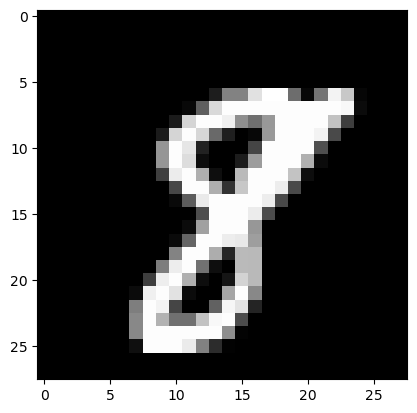

label: 8


In [110]:
pixels = X_train[55].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print('label:', y_train[55])

In [111]:
#Load test images

with open('t10k-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    X_test = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    X_test = X_test.reshape((size, nrows*ncols))
    
print(X_test.shape)

(10000, 784)


In [112]:
#Load test labels

with open('t10k-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">2i", f.read(8))
    y_test = struct.unpack('>%dB' % size, f.read())
    y_test = np.array(y_test, np.int32)
    
print(y_test.shape)

(10000,)


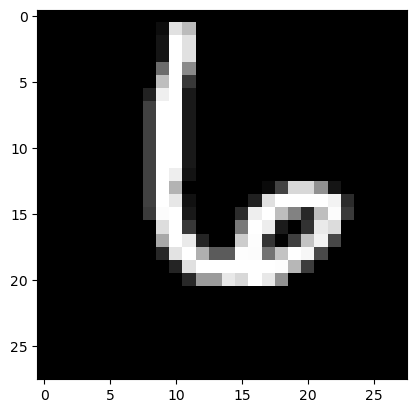

label: 6


In [113]:
pixels = X_test[156].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print('label:', y_test[156])

In [114]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [115]:
# Select subset of X_train and Y_train
X_train_sample = []
y_train_sample = []

for i in np.unique(y_train):
    x = X_train[y_train == i]
    y = y_train[y_train == i]
    
    indices = np.random.randint(low = 0,high = len(x), size = 1000)
    
    x = x[indices]
    y = y[indices]
    
    X_train_sample.extend(x)
    y_train_sample.extend(y)
    
X_train = np.array(X_train_sample)
y_train = np.array(y_train_sample)

In [116]:
def similarity_matrix(X, Y, similarity_metric):
    
    #X and Y are matrices of vectors
    #Rows represent individual vectors
    #Columns represents values for each feature of a vector
    
    
    #1 Eucledian Distance
    
    if similarity_metric == 'euclidean':
        X_2 = np.square(X)
        X_2 = X_2.sum(axis = 1).reshape(1, X.shape[0])
        X_2 = X_2 * np.ones(shape = (Y.shape[0],X.shape[0]), dtype = int)

        Y_2 = np.square(Y)
        Y_2 = Y_2.sum(axis = 1).reshape(Y.shape[0],1)
        Y_2 = Y_2 * np.ones(shape = (1,X.shape[0]), dtype = int)

        similarity_matrix = np.sqrt(Y_2 + X_2 - 2 * np.matmul(Y, X.T))
        
    #3 Manhattan Distance
    
    elif similarity_metric == 'manhattan':
        from scipy.spatial.distance import cityblock
        similarity_matrix = np.zeros((Y.shape[0],X.shape[0]))
        for i in range(Y.shape[0]):
            for j in range(X.shape[0]):
                similarity_matrix[i][j] += cityblock(Y[i],X[j])
                
    #Edit Distance
    
    elif similarity_metric == 'edit_distance':
        max_dist = X.shape[1] * np.ones(shape = (Y.shape[0],X.shape[0])) 
        similarity_matrix = 0.5 * (max_dist - np.matmul(Y, X.T))
          
    return similarity_matrix

In [117]:
#Normalize Features

# Shift-and-scale normalization (Min - Max Scaling)
# Subtract min from each value and divide by new max

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train) 
X_test_scaled = min_max_scaler.transform(X_test)    #test data is scaled using train data

In [118]:
similarity = similarity_matrix(X_train_scaled, X_test_scaled, similarity_metric='euclidean')

In [119]:
y_train[np.argsort(1*similarity[157])[:10]]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [120]:
top_ten_similar_mnist = y_train[np.argsort(1*similarity[157])[0:10]]
top_ten_similar_mnist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [121]:
#Normalize Features

# 0Mean-1SD normalization
# Subtract mean from each value and divide by standard deviation

from sklearn import preprocessing

mean_std_scaler = preprocessing.StandardScaler()

X_train_scaled = mean_std_scaler.fit_transform(X_train)
X_test_scaled = mean_std_scaler.transform(X_test)    #test data is scaled using train data

In [122]:
similarity = similarity_matrix(X_train_scaled, X_test_scaled, similarity_metric='euclidean')

In [123]:
top_ten_similar_mnist = y_train[np.argsort(1*similarity[156])[0:10]]
top_ten_similar_mnist

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [124]:
#Normalize Features

# -1/1 encoding
# Subtract mean from each value and divide by standard deviation

X_train_scaled = X_train.copy()
X_train_scaled[X_train_scaled < 50] = -1
X_train_scaled[X_train_scaled >= 50] = 1

X_test_scaled = X_test.copy()
X_test_scaled[X_test_scaled < 50] = -1
X_test_scaled[X_test_scaled >= 50] = 1

In [125]:
similarity = similarity_matrix(X_train_scaled, X_test_scaled, similarity_metric='edit_distance')

In [126]:
top_ten_similar_mnist = y_train[np.argsort(1*similarity[156])[0:10]]
top_ten_similar_mnist

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

#### KNN MNIST

In [127]:
class KNN:
    def __init__(self,k):
        self.k = k
    
    def fit(self, X,y):
        self.X_train = X
        self.y_train = y
        
    
    def predict(self, X):
        self.similarity = similarity_matrix(self.X_train, X, similarity_metric='euclidean')
        predicted_labels = [self.predict_each(i) for i in range(len(X))]
        return np.array(predicted_labels)
    
    def predict_each(self,i):
        top_k_similar = self.y_train[np.argsort(1*self.similarity[i])[0:self.k]]
        most_common_label = Counter(top_k_similar).most_common(1)
        return most_common_label[0][0]
        
    
    def similarity_matrix(X, Y, similarity_metric):

        #X and Y are matrices of vectors
        #Rows represent individual vectors
        #Columns represents values for each feature of a vector


        #1 Eucledian Distance
        ## use scikit learn to calculate eucledian

        if similarity_metric == 'euclidean':
            X_2 = np.square(X)
            X_2 = X_2.sum(axis = 1).reshape(1, X.shape[0])
            X_2 = X_2 * np.ones(shape = (Y.shape[0],X.shape[0]), dtype = int)

            Y_2 = np.square(Y)
            Y_2 = Y_2.sum(axis = 1).reshape(Y.shape[0],1)
            Y_2 = Y_2 * np.ones(shape = (1,X.shape[0]), dtype = int)

            self.similarity_matrix = np.sqrt(Y_2 + X_2 - 2 * np.matmul(Y, X.T))

        #3 Manhattan Distance

        elif similarity_metric == 'manhattan':
            from scipy.spatial.distance import cityblock
            self.similarity_matrix = np.zeros((Y.shape[0],X.shape[0]))
            for i in range(Y.shape[0]):
                for j in range(X.shape[0]):
                    self.similarity_matrix[i][j] += cityblock(Y[i],X[j])

        #Edit Distance

        elif similarity_metric == 'edit_distance':
            max_dist = X.shape[1] * np.ones(shape = (Y.shape[0],X.shape[0])) 
            self.similarity_matrix = 0.5 * (max_dist - np.matmul(Y, X.T))
        
        elif similarity_metric == 'eucledian_lib':
            from sklearn.metrics.pairwise import pairwise_distances, euclidean_distances
            distances = euclidean_distances(X,Y)
            similarity_matrix = 1- distances

        return self.similarity_matrix


In [128]:
#Normalize Features

# Shift-and-scale normalization (Min - Max Scaling)
# Subtract min from each value and divide by new max

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train) 
X_test_scaled = min_max_scaler.transform(X_test)    #test data is scaled using train data

In [129]:
knn = KNN(k=10)

In [130]:
knn.fit(X_train, y_train)

In [131]:
y_predicted = knn.predict(X_test)

In [132]:
from sklearn import metrics


accuracy = metrics.accuracy_score(y_test, y_predicted)
print("MNIST Accuracy : ", accuracy)

MNIST Accuracy :  0.9441


### 20 NG

In [71]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [73]:
newsgroups_train.data

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

In [74]:
def clean_message(message, reduction_to_base = None):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 

    '''
    #Remove Punctuation
    messages_cleaned = re.sub(r'[^\w\s]', '', message)
    
    #Remove Links
    messages_cleaned = re.sub(r'https?://\S+', '', messages_cleaned)
    
    #Lower Case
    messages_cleaned = messages_cleaned.lower()
    
    #Tokenize
    messages_cleaned = word_tokenize(messages_cleaned)
    
    #Remove Stopwords
    stop_words_list = stopwords.words('english')
    for token in messages_cleaned:
        if token in stop_words_list:
            messages_cleaned.remove(token)
    
    #Perform Stemming/Lemmatization
    if reduction_to_base == 'stem':
        temp = messages_cleaned.copy()
        messages_cleaned.clear()
        for token in temp:
            messages_cleaned.append(PorterStemmer().stem(token))
            
    elif reduction_to_base == 'lemmatize':
        lemmatizer = WordNetLemmatizer()
        temp = messages_cleaned.copy()
        messages_cleaned.clear()
        for token in temp:
            messages_cleaned.append(lemmatizer.lemmatize(token))
            
    #rejoin message tokens
    messages_cleaned = ' '.join(messages_cleaned)

    return messages_cleaned

In [75]:
X_train = []
for message in tqdm(newsgroups_train.data):
    X_train.append(clean_message(message, reduction_to_base = 'lemmatize'))

X_train

100%|██████████| 11314/11314 [01:20<00:00, 141.34it/s]


['wondering anyone there could enlighten car saw other day wa 2door sport car looked be late 60 early 70 wa called bricklin door really small addition the front bumper wa separate the rest the body i know anyone tellme model name engine spec year production this car is made history whatever info have on this funky looking car please email',
 'fair number brave soul upgraded si clock oscillator shared experience poll please send brief message detailing experience procedure top speed attained cpu rated speed add card adapter heat sink hour usage per day floppy disk functionality 800 14 floppy especially requested will summarizing the next two day please add the network knowledge base you done the clock upgrade havent answered this poll thanks',
 'well folk mac plus finally gave ghost weekend starting life 512k way back 1985 sooo im market new machine bit sooner intended be im looking picking powerbook 160 maybe 180 bunch question hopefully somebody answer anybody know dirt when next roun

In [76]:
X_train[1]

'fair number brave soul upgraded si clock oscillator shared experience poll please send brief message detailing experience procedure top speed attained cpu rated speed add card adapter heat sink hour usage per day floppy disk functionality 800 14 floppy especially requested will summarizing the next two day please add the network knowledge base you done the clock upgrade havent answered this poll thanks'

In [77]:
# Clean X_test

X_test = []
for message in tqdm(newsgroups_test.data):
    X_test.append(clean_message(message, reduction_to_base = 'lemmatize'))
    
X_test

100%|██████████| 7532/7532 [00:28<00:00, 263.45it/s]


['am little confused all model the 8889 bonnevilles have heard the le se lse sse ssei could someone tell the difference far feature performance am also curious know the book value for prefereably the 89 model much le book value you usually get for other word how much they demand time year have heard the midspring early summer the best time buy',
 'im familiar all the format these xface thingies after seeing folk header ive got see maybe make one my ive got dpgview my linux box display uncompressed xfaces and ive managed compile uncompface that im looking them cant seem find xfaces in anyones news header could would please send your xface header know ill probably get little swamped but i handle i hope',
 'a word yes',
 'attacking iraqi drive kuwait country whose citizen close blood business tie saudi citizen me think u helped iraqi would swallowed saudi arabia least eastern oilfield no muslim country doing much anything help liberate kuwait protect saudi arabia indeed mass citizen demon

In [78]:
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [79]:
# Normalize Features Using TFIDF

#Train data

count_vect = CountVectorizer(min_df=2)
vectors_train = count_vect.fit_transform(X_train)

# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
vectors_train = tfidf_transformer.fit_transform(vectors_train)


#Test Data

vectors_test = count_vect.transform(X_test)
vectors_test = tfidf_transformer.transform(vectors_test)


#Convert to nparrays to feed into similarity function
vectors_train = np.asarray(vectors_train.todense())
vectors_test = np.asarray(vectors_test.todense())

In [80]:
print(vectors_train.shape)
print(vectors_test.shape)
print(len(y_train))
print(len(y_test))

(11314, 33528)
(7532, 33528)
11314
7532


In [81]:
def similarity_matrix(X, Y, similarity_metric):
    
    #X and Y are matrices of vectors
    #Rows represent individual vectors
    #Columns represents values for each feature of a vector
    
    
    #1 Eucledian Distance
    
    if similarity_metric == 'euclidean':
        X_2 = np.square(X)
        X_2 = X_2.sum(axis = 1).reshape(1, X.shape[0])
        X_2 = X_2 * np.ones(shape = (Y.shape[0],X.shape[0]), dtype = int)

        Y_2 = np.square(Y)
        Y_2 = Y_2.sum(axis = 1).reshape(Y.shape[0],1)
        Y_2 = Y_2 * np.ones(shape = (1,X.shape[0]), dtype = int)

        similarity_matrix = np.sqrt(Y_2 + X_2 - 2 * np.matmul(Y, X.T))
        
    #3 Manhattan Distance
    
    elif similarity_metric == 'manhattan':
        from scipy.spatial.distance import cityblock
        similarity_matrix = np.zeros((Y.shape[0],X.shape[0]))
        for i in range(Y.shape[0]):
            for j in range(X.shape[0]):
                similarity_matrix[i][j] += cityblock(Y[i],X[j])
                
    #Edit Distance
    
    elif similarity_metric == 'edit_distance':
        max_dist = X.shape[1] * np.ones(shape = (Y.shape[0],X.shape[0])) 
        similarity_matrix = 0.5 * (max_dist - np.matmul(Y, X.T))
          
    return similarity_matrix

In [82]:
similarity = similarity_matrix(vectors_train, vectors_test, similarity_metric='euclidean')

In [83]:
top_ten_similar_20NG = y_train[np.argsort(1*similarity[11])[0:10]]
top_ten_similar_20NG

array([ 2, 10,  9,  4, 17,  3,  0,  0,  1,  9])

In [84]:
# # Normalize Features Using -1/1

# #Train data

# count_vect = CountVectorizer(min_df=2)
# vectors_train = count_vect.fit_transform(X_train)
# vectors_train = np.asarray(vectors_train.todense())
# vectors_train[vectors_train > 0] = 1
# vectors_train[vectors_train == 0] = -1

# #Test Data

# vectors_test = count_vect.transform(X_test)
# vectors_test = np.asarray(vectors_test.todense())
# vectors_test[vectors_test > 0] = 1
# vectors_test[vectors_test == 0] = -1

In [85]:
print(vectors_train.shape)
print(vectors_test.shape)
print(len(y_train))
print(len(y_test))

(11314, 33528)
(7532, 33528)
11314
7532


### 20 NG KNN

In [86]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [87]:
target_groups = ["alt.atheism", "sci.med", "sci.electronics", "comp.graphics", "talk.politics.guns", "sci.crypt"]


newsgroups_train = fetch_20newsgroups(subset='train', categories=target_groups, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=target_groups, remove=('headers', 'footers', 'quotes'))

In [88]:
newsgroups_train.data

['I would like to modulate a 40KHz squarewave over rf. This is for a rf\nremote control project. The squarewave has a high of 5 v and low of 0v.\n\nthanks.\n\ntron',
 "I was wondering if anyone knows where I can get more information about\nthe graphics in the WingCommander series, and the RealSpace system they use.\nI think it's really awesome, and wouldn't mind being able to use similar\nfeatures in programs.  Thanks in advance.\n",
 "\n\n\n\n\n\n\n\n\nYeah, of course... The term 'mach banding' was not the correct one, it should've\nbeen 'color quantization effect'. Although a bad color quantization effect could\nresult in some visible mach-bands on a picture that was smooth before it was\nquantizised.\n",
 '\nCandida albicans can cause severe life-threatening infections, usually\nin people who are otherwise quite ill.  This is not, however, the sort\nof illness that you are probably discussing.\n\n"Systemic yeast syndrome" where the body is allergic to\nyeast is considered a quack di

In [89]:
def clean_message(message, reduction_to_base = None):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 

    '''
    #Remove Punctuation
    messages_cleaned = re.sub(r'[^\w\s]', '', message)
    
    #Remove Links
    messages_cleaned = re.sub(r'https?://\S+', '', messages_cleaned)
    
    #Lower Case
    messages_cleaned = messages_cleaned.lower()
    
    #Tokenize
    messages_cleaned = word_tokenize(messages_cleaned)
    
    #Remove Stopwords
    stop_words_list = stopwords.words('english')
    for token in messages_cleaned:
        if token in stop_words_list:
            messages_cleaned.remove(token)
    
    #Perform Stemming/Lemmatization
    if reduction_to_base == 'stem':
        temp = messages_cleaned.copy()
        messages_cleaned.clear()
        for token in temp:
            messages_cleaned.append(PorterStemmer().stem(token))
            
    elif reduction_to_base == 'lemmatize':
        lemmatizer = WordNetLemmatizer()
        temp = messages_cleaned.copy()
        messages_cleaned.clear()
        for token in temp:
            messages_cleaned.append(lemmatizer.lemmatize(token))
            
    #rejoin message tokens
    messages_cleaned = ' '.join(messages_cleaned)

    return messages_cleaned

In [90]:
X_train = []
for message in newsgroups_train.data:
    X_train.append(clean_message(message, reduction_to_base = 'lemmatize'))

X_train

['would like modulate 40khz squarewave rf is a rf remote control project squarewave a high 5 v low 0v thanks tron',
 'wa wondering anyone know get information the graphic the wingcommander series the realspace system use i think really awesome wouldnt mind able use similar feature program thanks advance',
 'yeah course term mach banding not correct one shouldve color quantization effect although bad color quantization effect could result some visible machbands a picture smooth it wa quantizised',
 'candida albicans cause severe lifethreatening infection usually people otherwise quite ill however sort illness you are probably discussing systemic yeast syndrome body allergic yeast is considered quack diagnosis mainstream medicine is book the yeast connection talk this illness is convincing evidence such disease exists',
 'require bgi driver super vga display super xvga display anyone know i could obtain relevant driver ftp site regard',
 'there way connect two pointing device one serial 

In [91]:
# Clean X_test

X_test = []
for message in newsgroups_test.data:
    X_test.append(clean_message(message, reduction_to_base = 'lemmatize'))
    
X_test

['freeman love accuracy becomes really ridiculous point possible certain circumstance many people carry concealed illinois read law commented judging reply received semantics tpg post many people tpg assume ccw law asked person asking possibility an ordinary citizen getting one would also follow said person would get ccw carry hisher person away their home andor business maybe freeman did prove point his point relevant thing most people seem care when ask question carrying concealed weapon whether not carry concealed their person when on street somewhere im sure not many people concerned whether not they carry concealed home speaking someone life illinois the place the quoted law relevant know it is legal own handgun not taking account city ordinance could care le whether not can carry concealed home i only care the fact i cant carry concealed the place it really count out on the street freeman love be accurate i can understand especially not seems be forgetting accurate fact dont alwa

In [92]:
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [93]:
# Normalize Features Using TFIDF

#Train data

count_vect = CountVectorizer(min_df=2)
vectors_train = count_vect.fit_transform(X_train)

# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
vectors_train = tfidf_transformer.fit_transform(vectors_train)


#Test Data

vectors_test = count_vect.transform(X_test)
vectors_test = tfidf_transformer.transform(vectors_test)


#Convert to nparrays to feed into similarity function
vectors_train = np.asarray(vectors_train.todense())
vectors_test = np.asarray(vectors_test.todense())

In [94]:
print(vectors_train.shape)
print(vectors_test.shape)
print(len(y_train))
print(len(y_test))

(3390, 14991)
(2257, 14991)
3390
2257


In [100]:
class KNN:
    def __init__(self,k):
        self.k = k
    
    def fit(self, X,y):
        self.X_train = X
        self.y_train = y
        
    
    def predict(self, X):
        self.similarity = self.similarity_matrix(self.X_train, X, similarity_metric='euclidean')
        predicted_labels = [self.predict_each(i) for i in range(len(X))]
        return np.array(predicted_labels)
    
    def predict_each(self,i):
        top_k_similar = self.y_train[np.argsort(1*self.similarity[i])[0:self.k]]
        most_common_label = Counter(top_k_similar).most_common(1)
        return most_common_label[0][0]
        
    
    def similarity_matrix(self, X, Y, similarity_metric):
    
        #X and Y are matrices of vectors
        #Rows represent individual vectors
        #Columns represents values for each feature of a vector


        #1 Eucledian Distance

        if similarity_metric == 'euclidean':
            X_2 = np.square(X)
            X_2 = X_2.sum(axis = 1).reshape(1, X.shape[0])
            X_2 = X_2 * np.ones(shape = (Y.shape[0],X.shape[0]), dtype = int)

            Y_2 = np.square(Y)
            Y_2 = Y_2.sum(axis = 1).reshape(Y.shape[0],1)
            Y_2 = Y_2 * np.ones(shape = (1,X.shape[0]), dtype = int)
            
            similarity_matrix = np.sqrt(Y_2 + X_2 - 2 * np.matmul(Y, X.T))

        #3 Manhattan Distance

        elif similarity_metric == 'manhattan':
            from scipy.spatial.distance import cityblock
            similarity_matrix = np.zeros((Y.shape[0],X.shape[0]))
            for i in range(Y.shape[0]):
                for j in range(X.shape[0]):
                    similarity_matrix[i][j] += cityblock(Y[i],X[j])

        #Edit Distance

        elif similarity_metric == 'edit_distance':
            max_dist = X.shape[1] * np.ones(shape = (Y.shape[0],X.shape[0])) 
            similarity_matrix = 0.5 * (max_dist - np.matmul(Y, X.T))
        
        elif similarity_metric == 'eucledian_lib':
            from sklearn.metrics.pairwise import pairwise_distances, euclidean_distances
            distances = euclidean_distances(X,Y)
            similarity_matrix = 1- distances

        return similarity_matrix


In [101]:
knn = KNN(k=100)
knn.fit(vectors_train, y_train)
y_predicted = knn.predict(vectors_test)

In [102]:
from sklearn import metrics


accuracy = metrics.accuracy_score(y_test, y_predicted)
print("20 NG Accuracy : ", accuracy)

20 NG Accuracy :  0.7111209570225964
